### Naive Bayes Model 

🔹 Naive Bayes Performance:
Accuracy: 0.8779

Classification Report:
               precision    recall  f1-score   support

          -1       0.42      0.67      0.52        12
           0       0.59      0.62      0.61        16
           1       0.95      0.91      0.93       185

    accuracy                           0.88       213
   macro avg       0.65      0.74      0.69       213
weighted avg       0.90      0.88      0.89       213



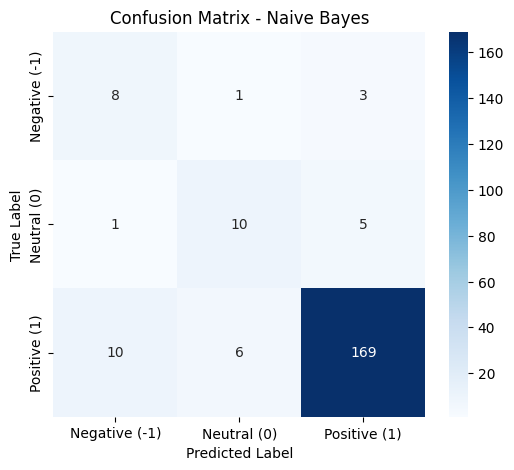

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load preprocessed datasets
X_train_smote = pd.read_csv("../Data/X_train_smote.csv")
y_train_smote = pd.read_csv("../Data/y_train_smote.csv")
X_test = pd.read_csv("../Data/X_test.csv")
y_test = pd.read_csv("../Data/y_test.csv")

# Convert y labels to numpy array (flatten)
y_train_smote = y_train_smote.values.ravel()
y_test = y_test.values.ravel()

# Train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate Performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"🔹 Naive Bayes Performance:\nAccuracy: {accuracy_nb:.4f}\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative (-1)", "Neutral (0)", "Positive (1)"], 
            yticklabels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


- ✔️ High Accuracy (88%) 
- ✔️ Positive (1) Class is Well Predicted
- ❌ Negative (-1) Class has Weak Performance
- ✔️ Neutral (0) Class is Moderately Balanced



Tuning
##### Try different alpha values: [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Define different alpha values
alpha_values = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]

best_alpha = None
best_accuracy = 0

# Loop through alpha values
for alpha in alpha_values:
    nb_model = MultinomialNB(alpha=alpha)
    nb_model.fit(X_train_smote, y_train_smote)
    
    y_pred_nb = nb_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_nb)
    
    print(f"Alpha: {alpha} - Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_alpha = alpha

# Train with the best alpha
print(f"\nBest alpha value: {best_alpha}")

nb_best = MultinomialNB(alpha=best_alpha)
nb_best.fit(X_train_smote, y_train_smote)
y_pred_best = nb_best.predict(X_test)

# Final report
print("\n🔹 Naive Bayes (Tuned) Performance:")
print(f"Accuracy: {best_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Alpha: 0.01 - Accuracy: 0.9061
Alpha: 0.1 - Accuracy: 0.9061
Alpha: 0.5 - Accuracy: 0.8873
Alpha: 1.0 - Accuracy: 0.8779
Alpha: 5.0 - Accuracy: 0.8638
Alpha: 10.0 - Accuracy: 0.8592

Best alpha value: 0.01

🔹 Naive Bayes (Tuned) Performance:
Accuracy: 0.9061

Classification Report:
               precision    recall  f1-score   support

          -1       0.62      0.42      0.50        12
           0       0.73      0.50      0.59        16
           1       0.93      0.97      0.95       185

    accuracy                           0.91       213
   macro avg       0.76      0.63      0.68       213
weighted avg       0.90      0.91      0.90       213



- ✔️ High recall for Positive (1) sentiment (97%) → Model is good at catching positive reviews.
- ✔️ Lower recall for Neutral (0) and Negative (-1) sentiments → May need further adjustments.
- ✔️ Better than default Naive Bayes, but still lower than Logistic Regression.



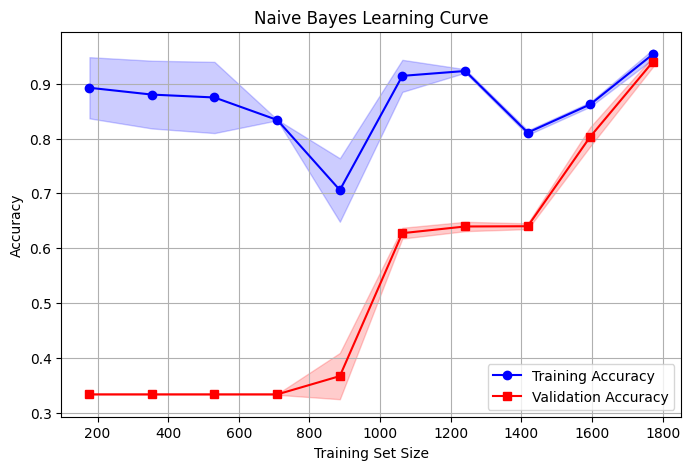

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot validation loss and accuracy for Naive Bayes
def plot_naive_bayes_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    
    # Plot training loss
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

    # Plot validation loss
    plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red", marker="s")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

    # Labels and title
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Naive Bayes Learning Curve")
    plt.legend()
    plt.grid()
    
    plt.show()

# Call the function
plot_naive_bayes_learning_curve(nb_model, X_train_smote, y_train_smote)


- ✅ Training Accuracy Curve → Indicates how well the model learns from training data.
- ✅ Validation Accuracy Curve → Shows generalization to unseen data.
- ✅ Gap Between Training & Validation → Helps detect overfitting or underfitting.